In [9]:
from kervis.dataset import Dataset
from kervis.utils import fetch_dataset
from kervis.kernels import Graphlet

In [10]:
dataset = Dataset("MUTAG")

In [11]:
k = 4

GL = Graphlet(k, connected=True)
GL.fit_transform(dataset.graphs)

In [12]:
GL.attributes

[0, 1]

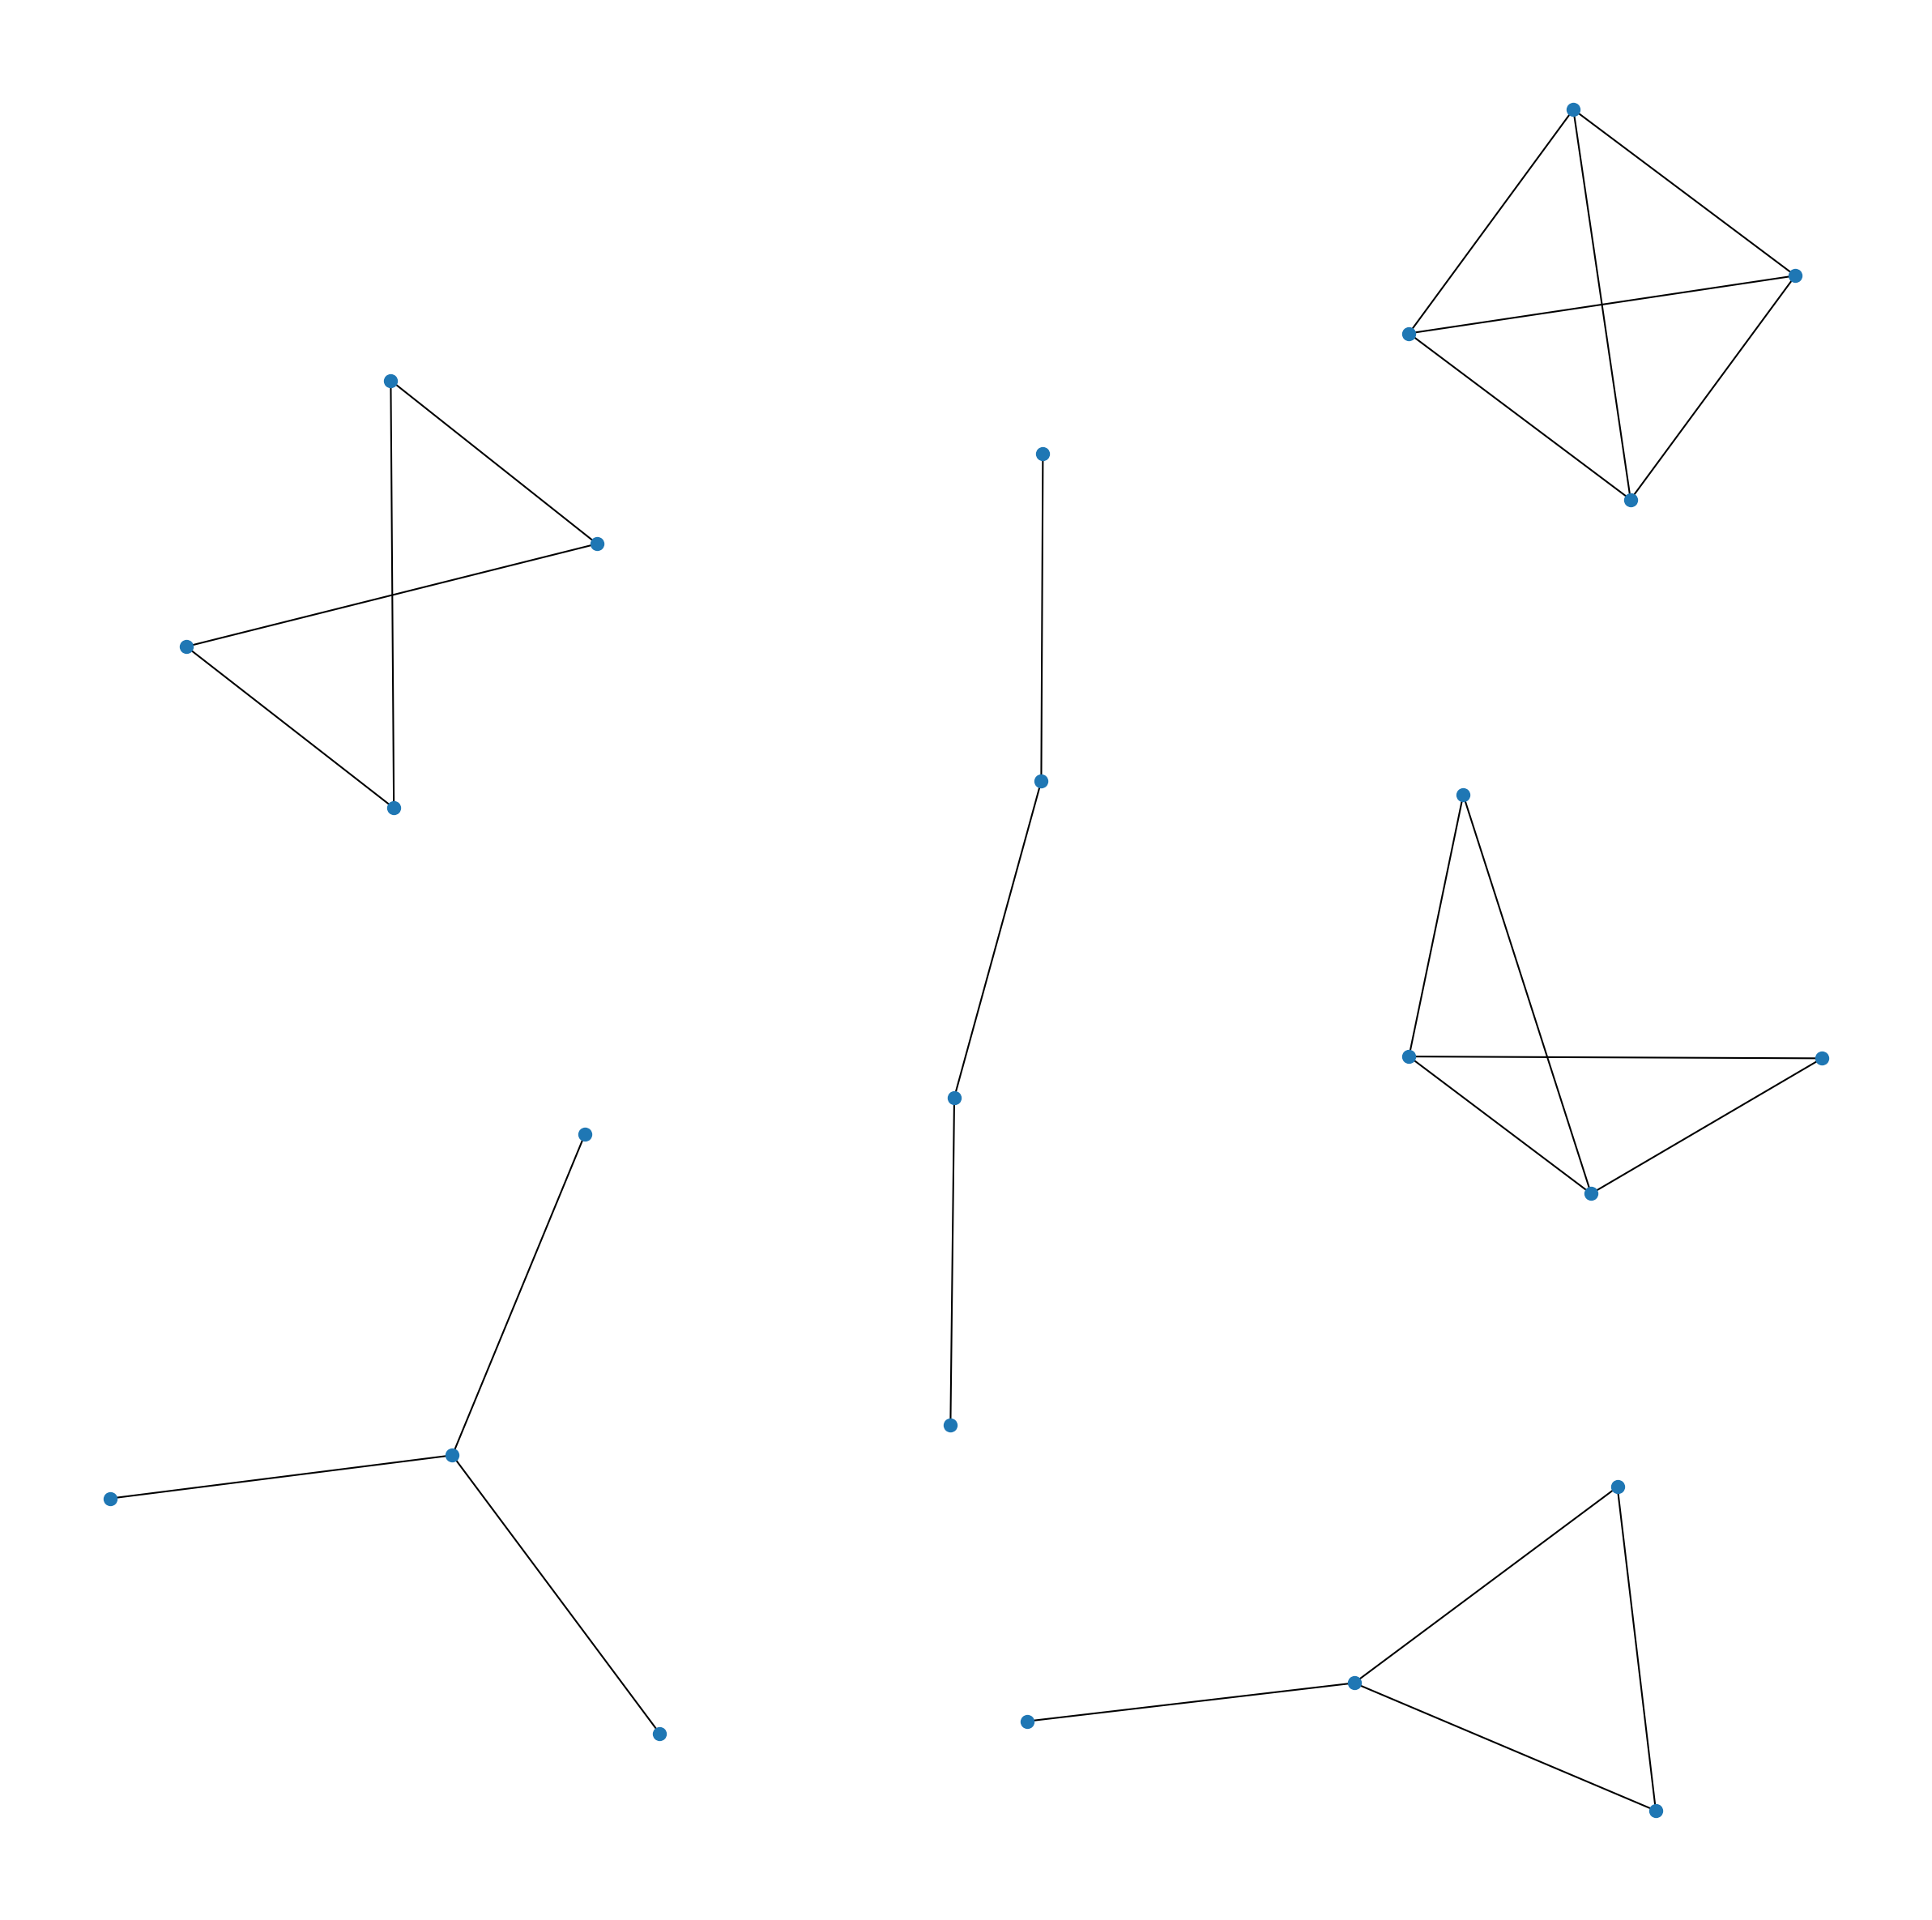

In [13]:
GL.plot_all_graphlet()

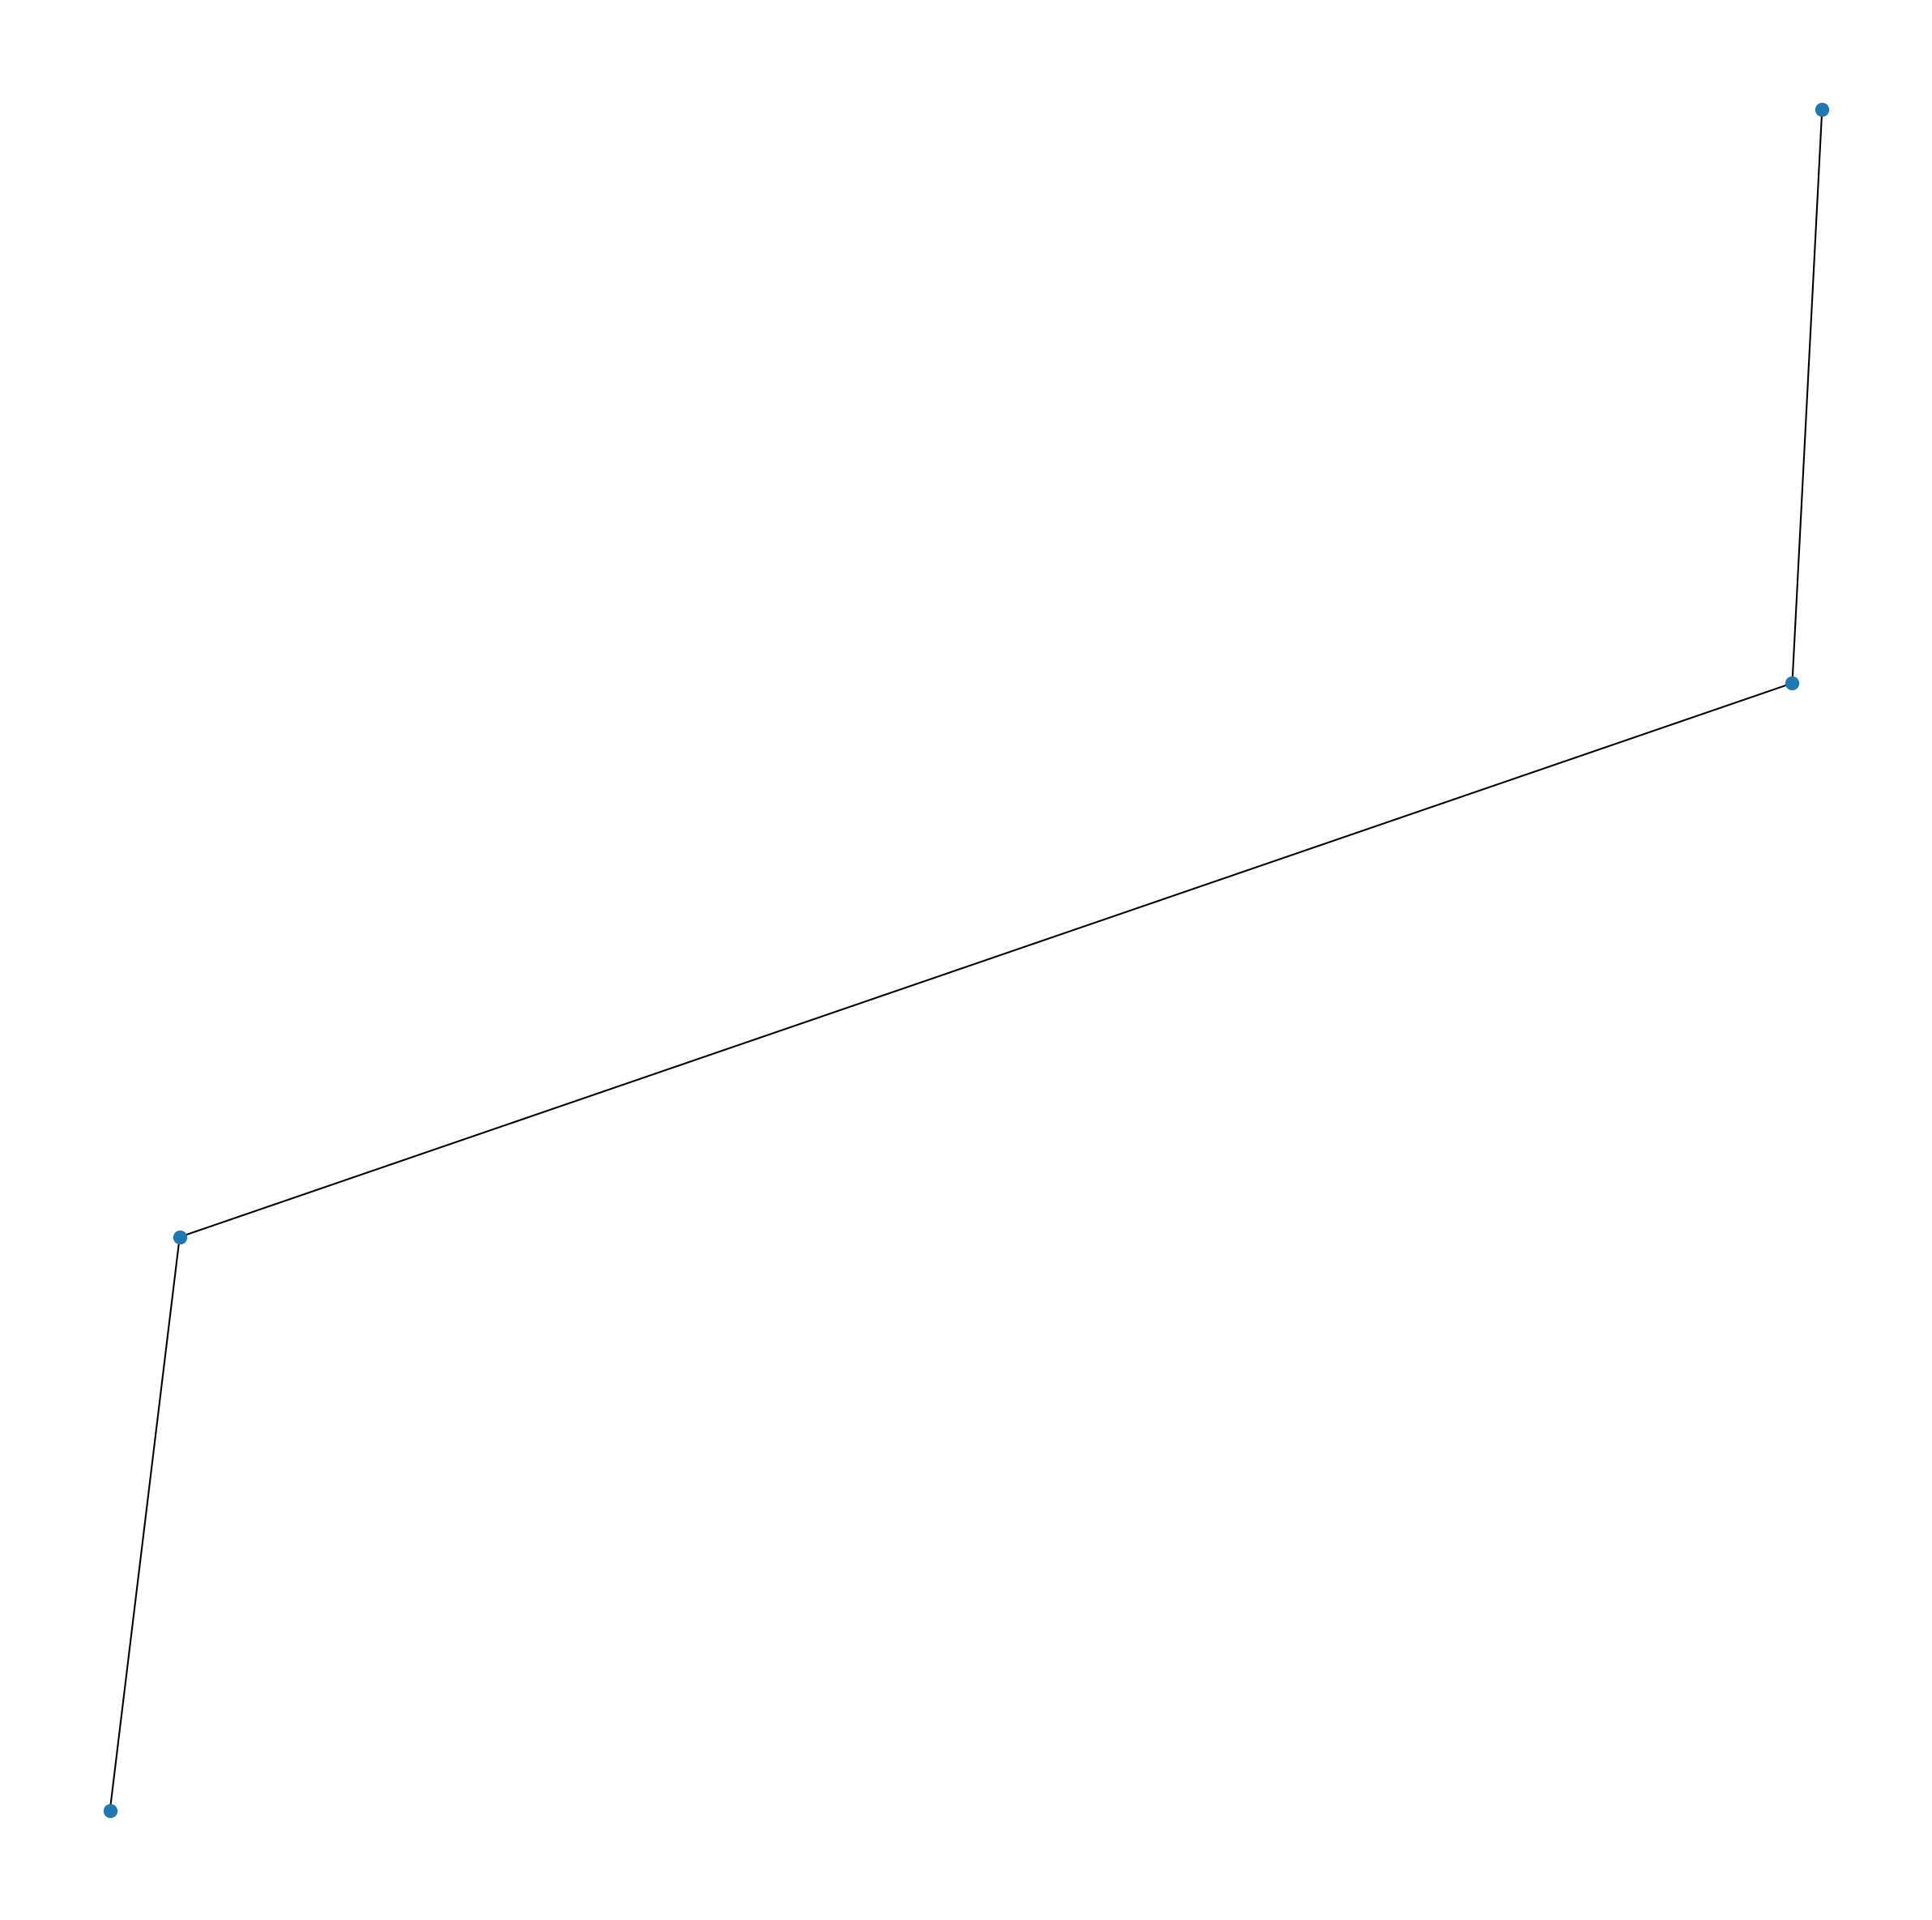

In [17]:
GL.plot_graphlet(GL.graphlets[1])